In [0]:
!kill -9 -1

In [2]:
!ls

datalab


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.plotly as py
import numpy as np
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloadedTest = drive.CreateFile({'id':'1rGfRRaEqKAT0EwyF8uZRTDbfVBDajiE_'}) # replace the id with id of file you want to access
downloadedTest.GetContentFile('test.csv')  

downloadedTrain = drive.CreateFile({'id':'14rKrVfwK_Q0YeDnCknCF9N5Gz-m5502U'}) # replace the id with id of file you want to access
downloadedTrain.GetContentFile('train.csv')

downloadedValidation = drive.CreateFile({'id':'16kjxp9JOgUVExDHlcTGGS4eGjoYP6m0N'}) # replace the id with id of file you want to access
downloadedValidation.GetContentFile('validation.csv')


#3. Read file as panda dataframe
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
validation = pd.read_csv('validation.csv')
mergedData = pd.concat([train, validation], axis=0, ignore_index=True)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



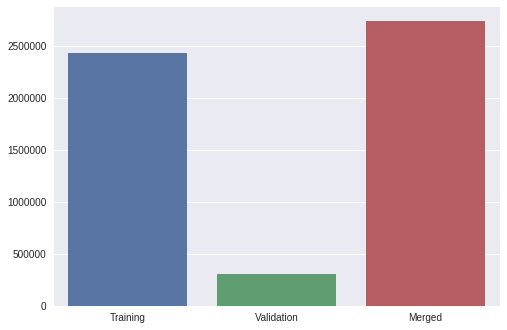

In [5]:
#IMPRESSIONS:
trainImpressions = train.shape[0]
validationImpressions = validation.shape[0]
mergedDataImpressions = mergedData.shape[0]
xImpressionColumn = ["Training","Validation","Merged"]
yImpressionColumn = [trainImpressions,validationImpressions,mergedDataImpressions]
sns.barplot(x=xImpressionColumn, y=yImpressionColumn);

In [0]:
validationImpressions = validation.shape[0]

In [7]:
#CLICKS1:
validation.groupby('click').click.count()
train.groupby('click').click.count()
#mergedData.groupby('click').click.count()

click
0    2429188
1       1793
Name: click, dtype: int64

In [0]:
#CLICKS2:
xClickColumn = ["Click = 1","Click = 0"]
yClickColumn = [1793,2429188]

In [0]:
#TOTAL COST1:
#sum(train['payprice'])
#sum(validation['payprice'])
#sum(test['payprice'])
#sum(np.nan_to_num(mergedData['payprice']))

In [0]:
#TOTAL COST2:
xCostColumn = ["Training","Validation","Test","Merged"]
yCostColumn = [189984608,23777270,213761878.0]

In [18]:
#AVERAGE CTR1
yClickColumn = np.asarray(yClickColumn)
yImpressionColumn = np.asarray(yImpressionColumn)
AvgCTRValues=np.true_divide(yClickColumn,yImpressionColumn)
AvgCTRValues*100 # Percentile Representation


array([0.07375623, 0.06646377, 0.07294583])

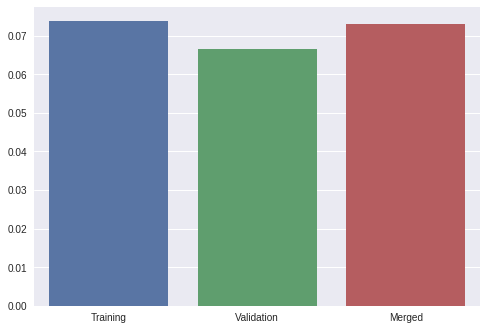

In [21]:
#AverageCTR2:
xAvgCTRColumn = ["Training","Validation","Merged"]
yAvgCTRColumn = [0.073756,0.066464,0.07294589]#SHOULD BE PERCENTAGES (WHICH THEY ARE)
sns.barplot(x=xAvgCTRColumn, y=yAvgCTRColumn);

In [22]:
#AVERAGE CPM1:
yCostColumn = np.asarray(yCostColumn)
yImpressionColumn = np.asarray(yImpressionColumn)
AvgCPMValues=np.true_divide(yCostColumn,yImpressionColumn)
AvgCPMValues

array([78.15141624, 78.2340051 , 78.16059418])

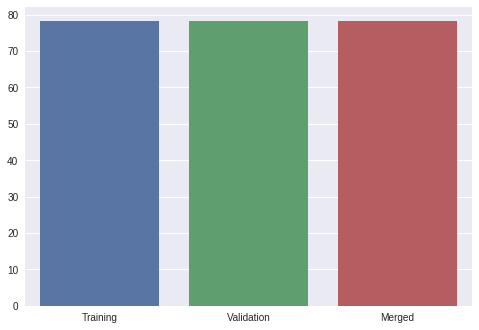

In [24]:
#AverageCPM2:
xAvgCPMColumn = ["Training","Validation","Merged"]
yAvgCPMColumn = [78.15141624, 78.2340051 , 78.16059418]
sns.barplot(x=xAvgCTRColumn, y=yAvgCTRColumn);